In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import mechanicalsoup
import pandas as pd
from pymongo import MongoClient
from multiprocessing import Process
import os
from signal import SIGINT
from threading import Timer

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tag import CRFTagger
from nltk.tokenize import sent_tokenize, word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
#connect to mongo localhost
conn = MongoClient('localhost', 27017)
db = conn.pi

#stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [4]:
#entering collection
data = db.detik_data

In [5]:
ids = []
title = []
content = []
label = []
created_date = []
get_published_date = []
keywords = []

In [6]:
for i in data.find():
    ids.append(i.get('id'))
    title.append(i.get('title'))
    content.append(i.get('content'))
    label.append(i.get('label'))
    created_date.append(i.get('created date'))
    get_published_date.append(i.get('get published date'))
    keywords.append(i.get('keywords'))

In [7]:
created_date_only = []
created_time_only = []

for i in created_date:
    time = i.split(" ")
    created_date_only.append(time[0])
    created_time_only.append(time[1])

In [8]:
published_date_only = []
published_time_only = []

for i in get_published_date:
    time = i.split(" ")
    published_date_only.append(time[0])
    published_time_only.append(time[1])

In [9]:
datas = {'id': ids, 'title': title, 'content':content, 'label':label, 'created_date':created_date_only, 'created_time':created_time_only, 'published_date': published_date_only, 'published_time': published_time_only, 'keywords': keywords}

In [10]:
df = pd.DataFrame.from_dict(datas)
df

id                                              title  \
0     6803346  Danny Pomanto Ungkap Pencapresan Anies Salah S...   
1     6803365  Ramai Olok-olok Nama Gedung DPR di Google Maps...   
2     6803556  Survei Capres LSJ: Prabowo 40,3%, Ganjar 32,6%...   
3     6803273  Della Puspita Umumkan Nikah Lagi Usai 10 Tahun...   
4     6803279  Wulan Guritno dan Sabda Ahessa Dicurigai Putus...   
...       ...                                                ...   
5129  6850138                  6 Cara Jual Rumah Biar Cepat Laku   
5130  6850131  Bocor! Ini Penampakan Adiputro Jetbus 5 yang B...   
5131  6850195  Korban Tewas Pertama Diserang Komodo Ternyata ...   
5132  6850165  Viral Dokter Makassar Aniaya Balita gegara Dig...   
5133  6850172  Jokowi: Urusan Sodetan Ciliwung Sudah Hampir 1...   

                                                content   label created_date  \
0     \n\nJakarta - Wali Kota Makassar Moh Ramdhan '...    News   2023/07/03   
1     \n\nJakarta - Ramai Gedung MPR/DPR RI ditandai...    News   2023/07/03   
2     \n\nJakarta - Lembaga Survei Jakarta (LSJ) men...    News   2023/07/03   
3     \n\n\n\nJakarta - Della Puspita membawa berita...     Hot   2023/07/03   
4     \n\n\n\nJakarta - Hubungan asmara Wulan Guritn...     Hot   2023/07/03   
...                                                 ...     ...          ...   
5129  \n\n\n\nDaftar Isi\n\n\n\n\r\n\t\t\t\t\t\t\t1....    None   2023/07/31   
5130  \n\n\n\nJakarta - Bus baru Adiputro Jetbus 5 t...     Oto   2023/07/31   
5131  \n\nJakarta - Serangan komodo hingga menewaska...    None   2023/07/31   
5132  \n\n\n\nJakarta - Viral dokter di Makassar ber...  Health   2023/07/31   
5133  \n\nJakarta - Presiden Joko Widodo (Jokowi) be...    News   2023/07/31   

     created_time published_date published_time  \
0        13:05:57     2023/07/03       13:10:22   
1        13:10:16     2023/07/03       13:19:30   
2        14:33:55     2023/07/03       14:42:15   
3        11:59:10     2023/07/03       14:00:00   
4        12:17:02     2023/07/03       12:35:10   
...           ...            ...            ...   
5129     09:11:46     2023/07/31       09:14:38   
5130     07:28:17     2023/07/31       09:07:44   
5131     09:35:42     2023/07/31       09:43:44   
5132     09:09:39     2023/07/31       09:31:23   
5133     09:27:09     2023/07/31       09:37:28   

                                               keywords  
0     danny pomanto,nasdem,anies baswedan,pemilu 202...  
1           gedung dpr,dpr ri,gedung dpr ri,anggota dpr  
2     anies baswedan,ganjar pranowo,prabowo subianto...  
3     della puspita,della puspita resmi menikah lagi...  
4     wulan guritno,wulan guritno sabda ahessa putus...  
...                                                 ...  
5129  tips jual rumah,tips menjual rumah,tips jual r...  
5130              adiputro,adiputro jetbus 5,giias 2023  
5131               komodo,berita terpopuler detiktravel  
5132  dokter makassar,dokter makassar aniaya balita,...  
5133  jokowi,presiden jokowi,sodetan ciliwung,proyek...  

[5134 rows x 9 columns]

In [11]:
df['label'].value_counts()

News         1607
Sepakbola     604
Inet          485
Oto           419
Food          244
Hot           221
Finance       190
Health        148
Edu           111
Sport          72
Hikmah         53
Name: label, dtype: int64

In [12]:
df.isna().sum()

id                  0
title               0
content           357
label             980
created_date        0
created_time        0
published_date      0
published_time      0
keywords            0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df['published_date'] = df['published_date'].str.replace('/', '-')
df['created_date'] = df['created_date'].str.replace('/', '-')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3394819641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_date'] = df['published_date'].str.replace('/', '-')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3394819641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_date'] = df['created_date'].str.replace('/', '-')


In [15]:
df['title'] = df['title'].str.lower()
df['label'] = df['label'].str.lower()
df['content'] = df['content'].str.lower()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\1538813693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].str.lower()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\1538813693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.lower()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\1538813693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [16]:
for i in df.index:
    tes = re.sub("\s\s+" , " ", df['content'][i])
    tes = re.sub(r'[^\w]', ' ', tes)
    tes = re.sub("\s\s+" , " ", tes)

    tokenize = word_tokenize(tes)
    tes = [word for word in tokenize if not word in stopwords.words('indonesian')]
    tes = " ".join(tes)
#     tes = stemmer.stem(tes)
    df['content'][i] = tes

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\144100510.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][i] = tes


In [17]:
df['content'] = df['content'].str.replace('googletag', '')
df['content'] = df['content'].str.replace('function', '')
df['content'] = df['content'].str.replace('https', '')
df['content'] = df['content'].str.replace('cdnstatic', '')
df['content'] = df['content'].str.replace('div', '')
df['content'] = df['content'].str.replace('display', '')
df['content'] = df['content'].str.replace('import', '')
df['content'] = df['content'].str.replace('url', '')
df['content'] = df['content'].str.replace('cmd', '')
df['content'] = df['content'].str.replace('push', '')
df['content'] = df['content'].str.replace('advertisement', '')
df['content'] = df['content'].str.replace('resume', '')
df['content'] = df['content'].str.replace('parallax', '')
df['content'] = df['content'].str.replace('160px', '')
df['content'] = df['content'].str.replace('css', '')
df['content'] = df['content'].str.replace('live', '')
df['content'] = df['content'].str.replace('_rmbassets', '')
df['content'] = df['content'].str.replace('gpt', '')
df['content'] = df['content'].str.replace('scroll', '')
df['content'] = df['content'].str.replace('paraa', '')
df['content'] = df['content'].str.replace('width', '')
df['content'] = df['content'].str.replace('content', '')
df['content'] = df['content'].str.replace(' e ', '')
df['content'] = df['content'].str.replace(' var ', '')
df['content'] = df['content'].str.replace(' para_fix ', '')
df['content'] = df['content'].str.replace('iframe', '')
df['content'] = df['content'].str.replace(' pe ', '')
df['content'] = df['content'].str.replace(' p ', '')
df['content'] = df['content'].str.replace(' ad ', '')
df['content'] = df['content'].str.replace('skybanner', '')
df['content'] = df['content'].str.replace('detik', '')
df['content'] = df['content'].str.replace('baca', '')
df['content'] = df['content'].str.replace(' gambas ', '')
df['content'] = df['content'].str.replace(' load ', '')
df['content'] = df['content'].str.replace(' video ', '')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.replace('googletag', '')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.replace('function', '')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.replace(' pe ', '')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'] = df['content'].str.replace(' p ', '')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\3920115486.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [19]:
a=""
for j in df['content']:
    a = a+" "+j
a

' jakarta wali kota makassar moh ramdhan danny pomanto buka bukaan terkait alasannya mundur partai nasdem danny pomanto menyebut salah alasannya mundur nasdem mengusulkan anies baswedan capres 2024 iya alasan pencapresan anies pilihan pribadi satunya alasan danny dilansir sulsel senin 3 7 2023  nasdem danny pomanto mundur ambisi gubernur sulselkendati danny ketua dewan pembina pro joko widodo projo sulawesi selatan sulsel detail arah dukungannya pilpres 2024 projo sulsel memutuskan menduetkan prabowo subianto airlangga hartarto      com   2022            1572507980488 0  to    on  dinamika lihat oktober kepastian danny danny mengaku keluarga istirahat pengunduran nasdem menyebut partai cocok dengannya anak istri mundur leg alasan keluarga istirahat kondisi partai rakyat partai cocok kemistri orang politik belajar  berita lengkapnya  walkot makassar danny pomanto istri anaknya mundur nasdemsimak eks dirkeu pdam walkot makassar terima asuransi dwiguna rp 600 jutavideo 20 maa gbr danny po

In [20]:
wc = WordCloud(
    background_color='white',
    max_words=5000)

wc.generate(a)

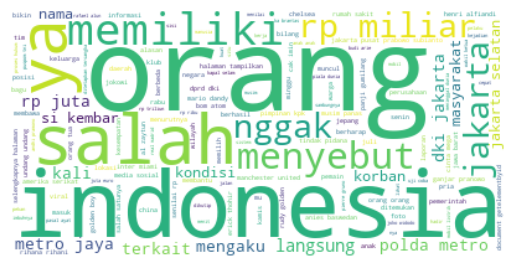

In [21]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
for i in df.index:
    tes = re.sub("\s\s+" , " ", df['content'][i])
    tes = tes.split()
    tes = " ".join(tes[1:])
    df['content'][i] = tes

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\485976370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content'][i] = tes


In [23]:
df

id                                              title  \
0     6803346  danny pomanto ungkap pencapresan anies salah s...   
1     6803365  ramai olok-olok nama gedung dpr di google maps...   
2     6803556  survei capres lsj: prabowo 40,3%, ganjar 32,6%...   
3     6803273  della puspita umumkan nikah lagi usai 10 tahun...   
4     6803279  wulan guritno dan sabda ahessa dicurigai putus...   
...       ...                                                ...   
5126  6850120  jokowi resmikan sodetan ciliwung yang sempat m...   
5127  6849831  david beckham ogah berteman lagi dengan harry-...   
5130  6850131  bocor! ini penampakan adiputro jetbus 5 yang b...   
5132  6850165  viral dokter makassar aniaya balita gegara dig...   
5133  6850172  jokowi: urusan sodetan ciliwung sudah hampir 1...   

                                                content   label created_date  \
0     wali kota makassar moh ramdhan danny pomanto b...    news   2023-07-03   
1     ramai gedung mpr dpr ri ditandai berkonotasi o...    news   2023-07-03   
2     lembaga survei jakarta lsj menggelar survei el...    news   2023-07-03   
3     della puspita membawa berita bahagia instagram...     hot   2023-07-03   
4     hubungan asmara wulan guritno sabda ahessa buc...     hot   2023-07-03   
...                                                 ...     ...          ...   
5126  presiden joko widodo jokowi meresmikan sodetan...    news   2023-07-31   
5127  pangeran harry meghan markle dikenal teman kal...     hot   2023-07-30   
5130  bus adiputro jetbus 5 tertangkap kamera melaju...     oto   2023-07-31   
5132  viral dokter makassar bernama makmur menganiay...  health   2023-07-31   
5133  presiden joko widodo jokowi bersyukur proyek s...    news   2023-07-31   

     created_time published_date published_time  \
0        13:05:57     2023-07-03       13:10:22   
1        13:10:16     2023-07-03       13:19:30   
2        14:33:55     2023-07-03       14:42:15   
3        11:59:10     2023-07-03       14:00:00   
4        12:17:02     2023-07-03       12:35:10   
...           ...            ...            ...   
5126     08:41:11     2023-07-31       08:54:58   
5127     21:30:34     2023-07-31       09:06:34   
5130     07:28:17     2023-07-31       09:07:44   
5132     09:09:39     2023-07-31       09:31:23   
5133     09:27:09     2023-07-31       09:37:28   

                                               keywords  
0     danny pomanto,nasdem,anies baswedan,pemilu 202...  
1           gedung dpr,dpr ri,gedung dpr ri,anggota dpr  
2     anies baswedan,ganjar pranowo,prabowo subianto...  
3     della puspita,della puspita resmi menikah lagi...  
4     wulan guritno,wulan guritno sabda ahessa putus...  
...                                                 ...  
5126  jokowi,presiden jokowi,sodetan kali ciliwung,p...  
5127         pangeran harry,meghan markle,david beckham  
5130              adiputro,adiputro jetbus 5,giias 2023  
5132  dokter makassar,dokter makassar aniaya balita,...  
5133  jokowi,presiden jokowi,sodetan ciliwung,proyek...  

[3971 rows x 9 columns]

In [24]:
import pickle
import joblib

vectorizer = pickle.load(open("feature_fix.pkl", "rb"))

In [25]:
xgb = joblib.load("xgb.joblib")

In [26]:
X_pred = vectorizer.transform(df['content'])

In [27]:
y_pred = xgb.predict(X_pred.toarray())
y_pred

array([0, 1, 1, ..., 1, 2, 2], dtype=int64)

In [28]:
datas_fix = {'id': ids, 'title': title, 'content':content, 'label':label, 'created_date':created_date_only, 'created_time':created_time_only, 'published_date': published_date_only, 'published_time': published_time_only, 'keywords': keywords, 'sentimen': y_pred}

In [29]:
df['sentimen'] = y_pred
df

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\1005098400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = y_pred


id                                              title  \
0     6803346  danny pomanto ungkap pencapresan anies salah s...   
1     6803365  ramai olok-olok nama gedung dpr di google maps...   
2     6803556  survei capres lsj: prabowo 40,3%, ganjar 32,6%...   
3     6803273  della puspita umumkan nikah lagi usai 10 tahun...   
4     6803279  wulan guritno dan sabda ahessa dicurigai putus...   
...       ...                                                ...   
5126  6850120  jokowi resmikan sodetan ciliwung yang sempat m...   
5127  6849831  david beckham ogah berteman lagi dengan harry-...   
5130  6850131  bocor! ini penampakan adiputro jetbus 5 yang b...   
5132  6850165  viral dokter makassar aniaya balita gegara dig...   
5133  6850172  jokowi: urusan sodetan ciliwung sudah hampir 1...   

                                                content   label created_date  \
0     wali kota makassar moh ramdhan danny pomanto b...    news   2023-07-03   
1     ramai gedung mpr dpr ri ditandai berkonotasi o...    news   2023-07-03   
2     lembaga survei jakarta lsj menggelar survei el...    news   2023-07-03   
3     della puspita membawa berita bahagia instagram...     hot   2023-07-03   
4     hubungan asmara wulan guritno sabda ahessa buc...     hot   2023-07-03   
...                                                 ...     ...          ...   
5126  presiden joko widodo jokowi meresmikan sodetan...    news   2023-07-31   
5127  pangeran harry meghan markle dikenal teman kal...     hot   2023-07-30   
5130  bus adiputro jetbus 5 tertangkap kamera melaju...     oto   2023-07-31   
5132  viral dokter makassar bernama makmur menganiay...  health   2023-07-31   
5133  presiden joko widodo jokowi bersyukur proyek s...    news   2023-07-31   

     created_time published_date published_time  \
0        13:05:57     2023-07-03       13:10:22   
1        13:10:16     2023-07-03       13:19:30   
2        14:33:55     2023-07-03       14:42:15   
3        11:59:10     2023-07-03       14:00:00   
4        12:17:02     2023-07-03       12:35:10   
...           ...            ...            ...   
5126     08:41:11     2023-07-31       08:54:58   
5127     21:30:34     2023-07-31       09:06:34   
5130     07:28:17     2023-07-31       09:07:44   
5132     09:09:39     2023-07-31       09:31:23   
5133     09:27:09     2023-07-31       09:37:28   

                                               keywords  sentimen  
0     danny pomanto,nasdem,anies baswedan,pemilu 202...         0  
1           gedung dpr,dpr ri,gedung dpr ri,anggota dpr         1  
2     anies baswedan,ganjar pranowo,prabowo subianto...         1  
3     della puspita,della puspita resmi menikah lagi...         1  
4     wulan guritno,wulan guritno sabda ahessa putus...         1  
...                                                 ...       ...  
5126  jokowi,presiden jokowi,sodetan kali ciliwung,p...         2  
5127         pangeran harry,meghan markle,david beckham         0  
5130              adiputro,adiputro jetbus 5,giias 2023         1  
5132  dokter makassar,dokter makassar aniaya balita,...         2  
5133  jokowi,presiden jokowi,sodetan ciliwung,proyek...         2  

[3971 rows x 10 columns]

In [30]:
df['sentimen'] = df['sentimen'].replace(0, 'Netral')
df['sentimen'] = df['sentimen'].replace(1, 'Positif')
df['sentimen'] = df['sentimen'].replace(2, 'Negatif')
df

C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\176507593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['sentimen'].replace(0, 'Netral')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\176507593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['sentimen'].replace(1, 'Positif')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_1748\176507593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

id                                              title  \
0     6803346  danny pomanto ungkap pencapresan anies salah s...   
1     6803365  ramai olok-olok nama gedung dpr di google maps...   
2     6803556  survei capres lsj: prabowo 40,3%, ganjar 32,6%...   
3     6803273  della puspita umumkan nikah lagi usai 10 tahun...   
4     6803279  wulan guritno dan sabda ahessa dicurigai putus...   
...       ...                                                ...   
5126  6850120  jokowi resmikan sodetan ciliwung yang sempat m...   
5127  6849831  david beckham ogah berteman lagi dengan harry-...   
5130  6850131  bocor! ini penampakan adiputro jetbus 5 yang b...   
5132  6850165  viral dokter makassar aniaya balita gegara dig...   
5133  6850172  jokowi: urusan sodetan ciliwung sudah hampir 1...   

                                                content   label created_date  \
0     wali kota makassar moh ramdhan danny pomanto b...    news   2023-07-03   
1     ramai gedung mpr dpr ri ditandai berkonotasi o...    news   2023-07-03   
2     lembaga survei jakarta lsj menggelar survei el...    news   2023-07-03   
3     della puspita membawa berita bahagia instagram...     hot   2023-07-03   
4     hubungan asmara wulan guritno sabda ahessa buc...     hot   2023-07-03   
...                                                 ...     ...          ...   
5126  presiden joko widodo jokowi meresmikan sodetan...    news   2023-07-31   
5127  pangeran harry meghan markle dikenal teman kal...     hot   2023-07-30   
5130  bus adiputro jetbus 5 tertangkap kamera melaju...     oto   2023-07-31   
5132  viral dokter makassar bernama makmur menganiay...  health   2023-07-31   
5133  presiden joko widodo jokowi bersyukur proyek s...    news   2023-07-31   

     created_time published_date published_time  \
0        13:05:57     2023-07-03       13:10:22   
1        13:10:16     2023-07-03       13:19:30   
2        14:33:55     2023-07-03       14:42:15   
3        11:59:10     2023-07-03       14:00:00   
4        12:17:02     2023-07-03       12:35:10   
...           ...            ...            ...   
5126     08:41:11     2023-07-31       08:54:58   
5127     21:30:34     2023-07-31       09:06:34   
5130     07:28:17     2023-07-31       09:07:44   
5132     09:09:39     2023-07-31       09:31:23   
5133     09:27:09     2023-07-31       09:37:28   

                                               keywords sentimen  
0     danny pomanto,nasdem,anies baswedan,pemilu 202...   Netral  
1           gedung dpr,dpr ri,gedung dpr ri,anggota dpr  Positif  
2     anies baswedan,ganjar pranowo,prabowo subianto...  Positif  
3     della puspita,della puspita resmi menikah lagi...  Positif  
4     wulan guritno,wulan guritno sabda ahessa putus...  Positif  
...                                                 ...      ...  
5126  jokowi,presiden jokowi,sodetan kali ciliwung,p...  Negatif  
5127         pangeran harry,meghan markle,david beckham   Netral  
5130              adiputro,adiputro jetbus 5,giias 2023  Positif  
5132  dokter makassar,dokter makassar aniaya balita,...  Negatif  
5133  jokowi,presiden jokowi,sodetan ciliwung,proyek...  Negatif  

[3971 rows x 10 columns]

In [31]:
coll_processed = db.processed_datas

In [32]:
for i in df.index:
    coll_processed.insert_one({"id": df['id'][i], "title": df['title'][i], "content": df['content'][i], "label": df['label'][i], "created_date": df['created_date'][i], "created_time": df['created_time'][i], "published_date": df['published_date'][i], "published_time": df['published_time'][i], "keywords": df['keywords'][i], "sumber": "detik", "sentimen": df['sentimen'][i]})

In [79]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')
hasil = ct.tag_sents([word_tokenize(df['content'][0])])
print(hasil)

[[('wali', 'NN'), ('kota', 'NN'), ('makassar', 'NN'), ('moh', 'NN'), ('ramdhan', 'NN'), ('danny', 'FW'), ('pomanto', 'FW'), ('buka', 'VB'), ('bukaan', 'NN'), ('terkait', 'VB'), ('alasannya', 'RB'), ('mundur', 'VB'), ('partai', 'NN'), ('nasdem', 'FW'), ('danny', 'FW'), ('pomanto', 'FW'), ('menyebut', 'VB'), ('salah', 'JJ'), ('alasannya', 'RB'), ('mundur', 'VB'), ('nasdem', 'NN'), ('mengusulkan', 'VB'), ('anies', 'NN'), ('baswedan', 'NN'), ('capres', 'NN'), ('2024', 'CD'), ('iya', 'NN'), ('alasan', 'NN'), ('pencapresan', 'NN'), ('anies', 'NN'), ('pilihan', 'NN'), ('pribadi', 'NN'), ('satunya', 'NN'), ('alasan', 'NN'), ('danny', 'FW'), ('dilansir', 'VB'), ('sulsel', 'NN'), ('senin', 'NN'), ('3', 'CD'), ('7', 'CD'), ('2023', 'CD'), ('nasdem', 'FW'), ('danny', 'FW'), ('pomanto', 'FW'), ('mundur', 'VB'), ('ambisi', 'NN'), ('gubernur', 'NN'), ('sulselkendati', 'VB'), ('danny', 'FW'), ('ketua', 'NN'), ('dewan', 'NN'), ('pembina', 'NN'), ('pro', 'JJ'), ('joko', 'NN'), ('widodo', 'NN'), ('projo'